## Pair Statistics

Here we make 

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

In [2]:
import pair_statistics_module as psm

In [3]:
# Use cell if wanting to reload modules while developing
#import importlib
#importlib.reload(psm)

<module 'pair_statistics_module' from '/home/dbalwada/GDP-earthcube-meeting-2022/pair_statistics_module.py'>

In [4]:
ds = xr.open_dataset('data/gdp_subset_lon_-35_to_5_lat_-40_to_-25.nc')
#ds = xr.open_dataset('data/gdp_subset_lon_-15_to_5_lat_-55_to_-35.nc')

In [5]:
ds.load()

<xarray.Dataset>
Dimensions:                (traj: 669, obs: 6860371)
Coordinates:
    ID                     (traj) int64 9222 9394 12221 ... 66978210 66979210
    lon                    (obs) float32 -26.45 -26.46 -26.47 ... 4.073 4.063
    lat                    (obs) float32 -39.99 -39.98 -39.96 ... -29.96 -29.95
    time                   (obs) datetime64[ns] 2000-01-28T03:00:00 ... 2020-...
    ids                    (obs) int64 9222 9222 9222 ... 66979210 66979210
Dimensions without coordinates: traj, obs
Data variables: (12/54)
    rowsize                (traj) int64 24951 13249 10326 ... 12539 12547 12547
    location_type          (traj) int8 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1
    WMO                    (traj) int32 3300560 0 1500608 ... 3301608 3301610
    expno                  (traj) int32 243 2065 9325 7325 ... 2222 2222 2222
    deploy_date            (traj) datetime64[ns] 1999-09-20 ... 2018-10-25
    deploy_lon             (traj) float32 -40.12 19.43 15.33 ... -56.1 -53.4
    ...                     ...
    err_sst                (obs) float32 0.08 0.075 0.06 ... 0.017 0.019 0.02
    err_sst1               (obs) float32 0.021 0.021 0.02 ... 0.006 0.007 0.007
    err_sst2               (obs) float32 0.07 0.066 0.051 ... 0.015 0.017 0.018
    flg_sst                (obs) int8 5 5 5 5 5 5 5 5 5 5 ... 5 5 5 5 5 5 5 5 5
    flg_sst1               (obs) int8 5 5 5 5 5 5 5 5 5 5 ... 5 5 5 5 5 5 5 5 5
    flg_sst2               (obs) int8 5 5 5 5 5 5 5 5 5 5 ... 5 5 5 2 2 5 5 5 5
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-06-27T13:53:17.908246
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

(array([5772732.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1087639.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

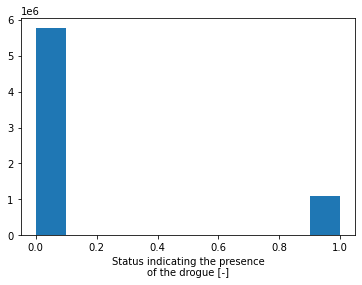

In [6]:
ds.drogue_status.plot.hist()

(array([  73877.,  255855.,  865962., 1473791.,  875471.,  551404.,
         298576.,  413167., 1079069.,  973199.]),
 array([2000., 2002., 2004., 2006., 2008., 2010., 2012., 2014., 2016.,
        2018., 2020.]),
 <BarContainer object of 10 artists>)

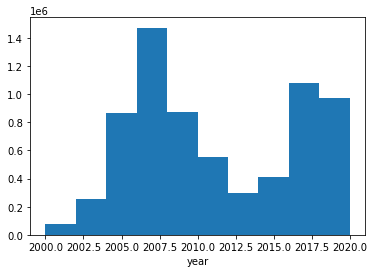

In [7]:
ds.time.dt.year.plot.hist()

(array([619574., 590296., 633026., 584416., 602027., 566783., 561046.,
        533955., 510224., 537858., 534463., 586703.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <BarContainer object of 12 artists>)

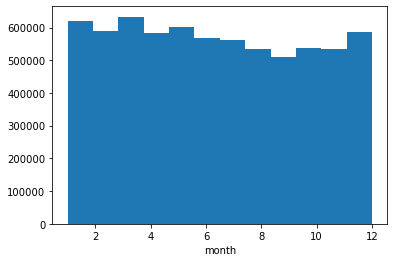

In [8]:
ds.time.dt.month.plot.hist(bins=12)

In [9]:
ds_drogued = ds.where(ds.drogue_status==1, drop=True)

In [279]:
ds_drogued

<xarray.Dataset>
Dimensions:                (traj: 732, obs: 989296)
Coordinates:
    ID                     (traj) int64 9222 9394 12221 ... 66978210 66979210
    lon                    (obs) float32 4.995 4.986 4.982 ... -2.649 -2.642
    lat                    (obs) float32 -30.23 -30.24 -30.25 ... -34.79 -34.8
    time                   (obs) datetime64[ns] 2001-08-31T13:00:00 ... 2020-...
    ids                    (obs) int64 9394 9394 9394 ... 66971150 66971150
Dimensions without coordinates: traj, obs
Data variables: (12/54)
    rowsize                (traj, obs) float64 2.495e+04 2.495e+04 ... 1.255e+04
    location_type          (traj, obs) float64 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0
    WMO                    (traj, obs) float64 3.301e+06 3.301e+06 ... 3.302e+06
    expno                  (traj, obs) float64 243.0 243.0 ... 2.222e+03
    deploy_date            (traj, obs) datetime64[ns] 1999-09-20 ... 2018-10-25
    deploy_lon             (traj, obs) float32 -40.12 -40.12 ... -53.4 -53.4
    ...                     ...
    err_sst                (obs) float32 0.02 0.018 0.018 ... 0.016 0.016 0.016
    err_sst1               (obs) float32 0.008 0.008 0.008 ... 0.006 0.006 0.006
    err_sst2               (obs) float32 0.017 0.017 0.019 ... 0.015 0.014 0.015
    flg_sst                (obs) float64 5.0 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0
    flg_sst1               (obs) float64 5.0 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0
    flg_sst2               (obs) float64 4.0 4.0 4.0 4.0 4.0 ... 2.0 2.0 2.0 2.0
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-06-27T13:53:17.908246
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [10]:
ds_drogued

<xarray.Dataset>
Dimensions:                (traj: 669, obs: 1087639)
Coordinates:
    ID                     (traj) int64 9222 9394 12221 ... 66978210 66979210
    lon                    (obs) float32 4.995 4.986 4.982 ... -27.37 -27.37
    lat                    (obs) float32 -30.23 -30.24 -30.25 ... -39.29 -39.29
    time                   (obs) datetime64[ns] 2001-08-31T13:00:00 ... 2019-...
    ids                    (obs) int64 9394 9394 9394 ... 66975220 66975220
Dimensions without coordinates: traj, obs
Data variables: (12/54)
    rowsize                (traj, obs) float64 2.495e+04 2.495e+04 ... 1.255e+04
    location_type          (traj, obs) float64 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0
    WMO                    (traj, obs) float64 3.301e+06 3.301e+06 ... 3.302e+06
    expno                  (traj, obs) float64 243.0 243.0 ... 2.222e+03
    deploy_date            (traj, obs) datetime64[ns] 1999-09-20 ... 2018-10-25
    deploy_lon             (traj, obs) float32 -40.12 -40.12 ... -53.4 -53.4
    ...                     ...
    err_sst                (obs) float32 0.02 0.018 0.018 ... 0.021 0.02 0.02
    err_sst1               (obs) float32 0.008 0.008 0.008 ... 0.007 0.007 0.007
    err_sst2               (obs) float32 0.017 0.017 0.019 ... 0.018 0.018 0.018
    flg_sst                (obs) float64 5.0 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0
    flg_sst1               (obs) float64 5.0 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0
    flg_sst2               (obs) float64 4.0 4.0 4.0 4.0 4.0 ... 5.0 5.0 2.0 5.0
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-06-27T13:53:17.908246
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [11]:
np.unique(ds_drogued.ids).shape

(335,)

In [12]:
dul = np.array([])
dut = np.array([])
dist = np.array([])
time_pair = np.array([]).astype('datetime64')

In [13]:
%%time 
## takes about 15 mins, but time scale roughly linearly wiht number of samples
for year in range(2000, 2021):
    print(year)
    #ds_yr = psm.retrieve_year(ds, year)
    ds_yr = psm.retrieve_year(ds_drogued, year)
    trajs = psm.ds2trajstruct(ds_yr)
    traj_arrays = {}
    traj_arrays['lon_array'], traj_arrays['lat_array'], traj_arrays['u_array'], traj_arrays['v_array'] = psm.trajstruct2arrays(trajs, year)
    timepairs = psm.trajarrays2timepairs(traj_arrays, year)
    dul_year, dut_year, dist_year, time_year = psm.timepairs2list(timepairs, year)
    
    dul = np.append(dul, dul_year)
    dut = np.append(dut, dut_year)
    dist = np.append(dist, dist_year)
    time_pair = np.append(time_pair, time_year)

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
CPU times: user 2min 42s, sys: 1.56 s, total: 2min 44s
Wall time: 2min 43s


In [14]:
ds_pairs = xr.Dataset()

ds_pairs['dul'] = xr.DataArray(dul, dims=['pairs'])
ds_pairs['dut'] = xr.DataArray(dut, dims=['pairs'])
ds_pairs['dist'] = xr.DataArray(dist, dims=['pairs'])
ds_pairs['time_pair'] = xr.DataArray(time_pair, dims=['pairs'])

In [15]:
ds_pairs

<xarray.Dataset>
Dimensions:    (pairs: 4738777)
Dimensions without coordinates: pairs
Data variables:
    dul        (pairs) float64 -0.2739 0.1595 0.1023 ... 0.2065 -0.06444 0.1949
    dut        (pairs) float64 0.1317 0.3702 0.02935 ... 0.5331 -0.1735 0.3398
    dist       (pairs) float64 7.663e+05 1.257e+06 ... 5.367e+05 1.593e+06
    time_pair  (pairs) datetime64[ns] 2000-01-01 2000-01-01 ... 2020-04-01

In [16]:
#ds_pairs.to_netcdf('data/pairs_Agulhas_lon_-15_to_5_lat_-45_to_-25.nc')

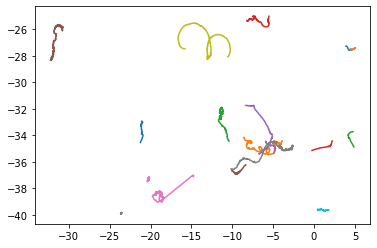

In [17]:
for i in range(len(trajs)):
    plt.plot(trajs[i].lon, trajs[i].lat)

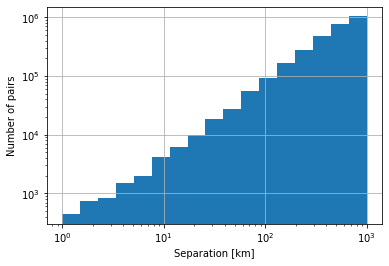

In [308]:
plt.hist(dist/1e3, bins=np.logspace(0, 3, 18));
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Separation [km]')
plt.ylabel('Number of pairs')
plt.grid()


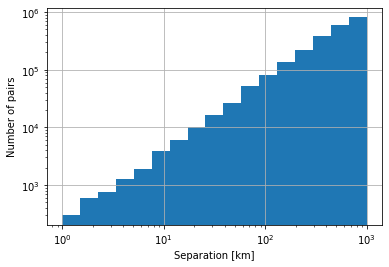

In [18]:
plt.hist(dist/1e3, bins=np.logspace(0, 3, 18));
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Separation [km]')
plt.ylabel('Number of pairs')
plt.grid()


In [19]:
dist_bin = np.logspace(3, 6, 15)
dist_axis = 0.5*(dist_bin[:-1] + dist_bin[1:])

In [20]:
dist_bin

array([   1000.        ,    1637.89370695,    2682.69579528,
          4393.97056076,    7196.85673001,   11787.68634794,
         19306.97728883,   31622.77660168,   51794.74679231,
         84834.28982441,  138949.54943731,  227584.59260748,
        372759.37203149,  610540.22965853, 1000000.        ])

In [21]:
SF2_ll = np.NaN*np.ones_like(dist_axis)
SF2_tt = np.NaN*np.ones_like(dist_axis)
SF3_lll = np.NaN*np.ones_like(dist_axis)
SF3_ltt = np.NaN*np.ones_like(dist_axis)
n = np.NaN*np.ones_like(dist_axis)

for i in range(len(dist_axis)): 
    id = np.logical_and(dist>dist_bin[i], 
                        dist<=dist_bin[i+1])
    
    SF2_ll[i] = np.nanmean(ds_pairs['dul'][id]**2)
    SF2_tt[i] = np.nanmean(ds_pairs['dut'][id]**2)
    
    SF3_lll[i] = np.nanmean(ds_pairs['dul'][id]**3)
    SF3_ltt[i] = np.nanmean(ds_pairs['dul'][id]*(ds_pairs['dut'][id]**2))
    

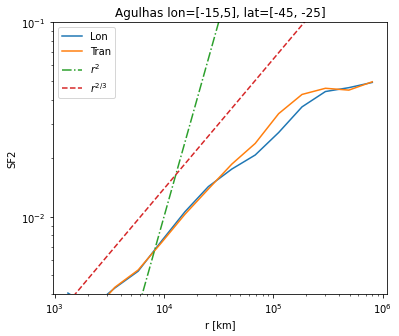

In [22]:
plt.figure(figsize=(6, 5))

plt.plot(dist_axis, SF2_ll, label='Lon')
plt.plot(dist_axis, SF2_tt, label='Tran')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 3e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([4e-3,1e-1])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Agulhas lon=[-15,5], lat=[-45, -25]')

plt.savefig('SF2_Agulhas.png')

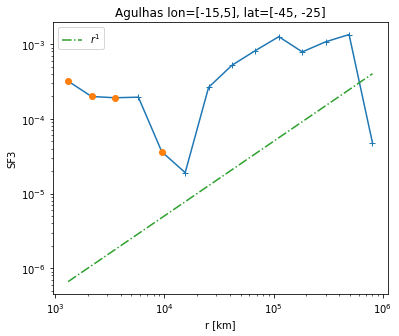

In [23]:
plt.figure(figsize=(6, 5))

plt.plot(dist_axis, np.abs(SF3_lll+SF3_ltt), '+-' )
plt.plot(dist_axis, -(SF3_lll+SF3_ltt) , 'o')
#plt.plot(dist_axis, SF3_ltt, label='Tran')

plt.plot(dist_axis, 5e-10*dist_axis**1, '-.',  label= '$r^1$')
#plt.plot(dist_axis, 3e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
#plt.ylim([1e-6,1e-3])
plt.xlabel('r [km]')
plt.ylabel('SF3')
plt.title('Agulhas lon=[-15,5], lat=[-45, -25]')

plt.savefig('SF3_Agulhas.png')

### Errorbars

In [24]:
Ttot = (24*3600)*365*10. # total duration of experiment (data)

Tscale_tot = 1./(((SF2_ll +SF2_tt)**0.5)/dist_axis); # A time scale based on velocity scales
dof = np.ceil(Ttot/Tscale_tot); # this is essentially T_tot/T_scale(r) # how many degrees of freedom can we fit into the total experiment time

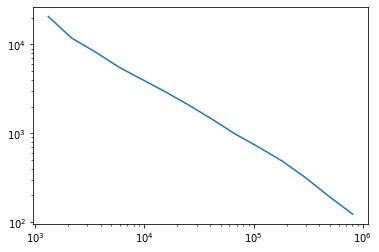

In [25]:
plt.plot(dist_axis, dof)
plt.yscale('log')
plt.xscale('log')

In [26]:
len_dist_axis = len(dist_axis)

In [27]:
pairs_dist = [psm.structtype() for i in range(len_dist_axis)]

In [28]:

for i in  range(len_dist_axis): 
    id = np.logical_and(ds_pairs.dist>dist_bin[i], 
                        ds_pairs.dist<=dist_bin[i+1])
    pairs_dist[i].dul = ds_pairs['dul'][id]
    pairs_dist[i].dut = ds_pairs['dut'][id]
    pairs_dist[i].time = ds_pairs.time_pair[id]
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13


(array([0.13872989, 0.08722488, 0.05263798, 0.05474058]),
 array([ 0.5,  3.5,  6.5,  9.5, 12.5]),
 <BarContainer object of 4 artists>)

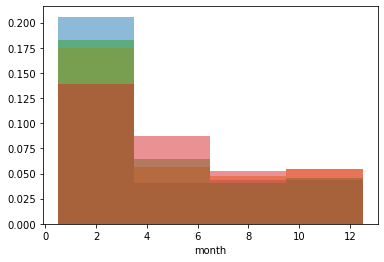

In [29]:
pairs_dist[5].time.dt.month.plot.hist(bins=np.linspace(0.5,12.5,5), density=True, alpha=0.5)
pairs_dist[6].time.dt.month.plot.hist(bins=np.linspace(0.5,12.5,5), density=True, alpha=0.5)
pairs_dist[7].time.dt.month.plot.hist(bins=np.linspace(0.5,12.5,5), density=True, alpha=0.5)
pairs_dist[-4].time.dt.month.plot.hist(bins=np.linspace(0.5,12.5,5), density=True, alpha=0.5)

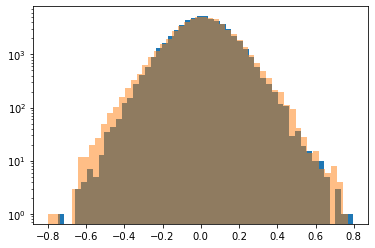

In [30]:
n = 8
plt.hist(pairs_dist[n].dul, bins=51)
plt.hist(pairs_dist[n].dut, bins=51, alpha=0.5)
plt.yscale('log')

In [31]:
npairs_sep = np.NaN*np.ones_like(dist_axis)
nblocks_sep = np.NaN*np.ones_like(dist_axis)
nsamps_per_block_sep = np.NaN*np.ones_like(dist_axis)


for i  in range(len_dist_axis):
    npairs_sep[i]  = len(pairs_dist[i].dul); # how long is the timeseries
    nblocks_sep[i] =  dof[i]#; % number of blocks at that separation (basically the dof)
    nsamps_per_block_sep[i] = np.ceil(npairs_sep[i]/ nblocks_sep[i]);


In [32]:
num_bs_samp = 100

SF2_ll_bs = np.NaN*np.ones((len_dist_axis, num_bs_samp))
SF2_tt_bs = np.NaN*np.ones((len_dist_axis, num_bs_samp))
SF3_bs    = np.NaN*np.ones((len_dist_axis, num_bs_samp))

for i in range(len_dist_axis):
    print(i)
    
    block_size = int(nsamps_per_block_sep[i]);
    nblocks = int(np.floor(npairs_sep[i]/nsamps_per_block_sep[i]));
    
    nmax = (nblocks*block_size);
    
    # make 2 arrays of shape block size X nblocks (some small amount of data is dropped in this step)
    dul_blocks = np.reshape(pairs_dist[i].dul[:nmax].values, (nblocks, block_size));
    dut_blocks = np.reshape(pairs_dist[i].dut[:nmax].values, (nblocks, block_size));
    
    
    for j in range(num_bs_samp):
        
        ids = np.random.choice(np.arange(0,nblocks,1), size=nblocks, replace=True)
        
        dul_bs = np.reshape(dul_blocks[ids, :], (-1))
        dut_bs = np.reshape(dut_blocks[ids, :], (-1))
        
        SF2_ll_bs[i,j] = np.nanmean(dul_bs**2)
        SF2_tt_bs[i,j] = np.nanmean(dut_bs**2)
        
        SF3_bs[i,j] = np.nanmean(dul_bs*(dul_bs**2 + dut_bs**2 ) )

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [33]:
SF2_ll_mean = np.nanmean(SF2_ll_bs, axis=1)
SF2_ll_ci = np.nanpercentile(SF2_ll_bs, [1,99], axis=1)

SF2_tt_mean = np.nanmean(SF2_tt_bs, axis=1)
SF2_tt_ci = np.nanpercentile(SF2_tt_bs, [1,99], axis=1)

SF3_mean = np.nanmean(SF3_bs, axis=1)
SF3_ci = np.nanpercentile(SF3_bs, [1,99], axis=1)

Text(0.5, 1.0, 'Agulhas lon=[-15,5], lat=[-45, -25]')

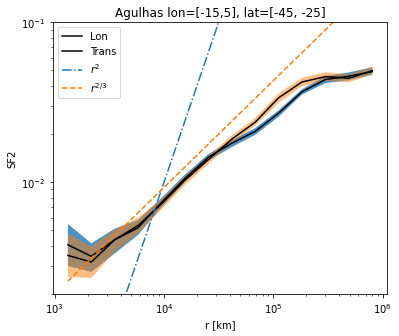

In [34]:
plt.figure(figsize=(6, 5))


plt.fill_between(dist_axis,SF2_ll_ci[0,:], SF2_ll_ci[1,:] , alpha=0.8)
plt.plot(dist_axis, SF2_ll_mean, label='Lon', color='k')
#plt.plot(dist_axis, SF2_ll_ci[0,:], label='Lon')
#plt.plot(dist_axis, SF2_ll_ci[1,:], label='Lon')

plt.fill_between(dist_axis,SF2_tt_ci[0,:], SF2_tt_ci[1,:], alpha=0.5 )
plt.plot(dist_axis, SF2_tt_mean, label='Trans', color='k')
#plt.plot(dist_axis, SF2_tt_mean, label='Lon')
#plt.plot(dist_axis, SF2_tt_ci[0,:], label='Lon')
#plt.plot(dist_axis, SF2_tt_ci[1,:], label='Lon')
#plt.plot(dist_axis, SF2_tt, label='Tran')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([2e-3,1e-1])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Agulhas lon=[-15,5], lat=[-45, -25]')

#### Rotational-Divergent

In [35]:
SF2_rr_bs = np.zeros_like(SF2_ll_bs)
SF2_dd_bs = np.zeros_like(SF2_ll_bs)


for i in range(num_bs_samp):
    
    SF2_rr_bs[:, i], SF2_dd_bs[:, i] = psm.helmholtz_decompose( dist_axis, SF2_ll_bs[:,i], SF2_tt_bs[:,i] )
    

In [36]:
SF2_rr_mean = np.nanmean(SF2_rr_bs, axis=1)
SF2_rr_ci = np.nanpercentile(SF2_rr_bs, [1,99], axis=1)

SF2_dd_mean = np.nanmean(SF2_dd_bs, axis=1)
SF2_dd_ci = np.nanpercentile(SF2_dd_bs, [1,99], axis=1)

Text(0.5, 1.0, 'Agulhas lon=[-15,5], lat=[-45, -25]')

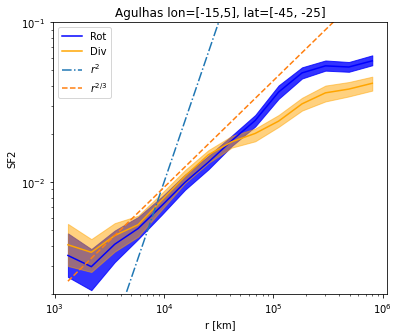

In [37]:
plt.figure(figsize=(6, 5))


plt.fill_between(dist_axis,SF2_rr_ci[0,:], SF2_rr_ci[1,:] , alpha=0.8, color='Blue')
plt.plot(dist_axis, SF2_rr_mean, label='Rot', color='Blue')


plt.fill_between(dist_axis,SF2_dd_ci[0,:], SF2_dd_ci[1,:], alpha=0.5, color='Orange' )
plt.plot(dist_axis, SF2_dd_mean, label='Div', color='Orange')


plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([2e-3,1e-1])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Agulhas lon=[-15,5], lat=[-45, -25]')

#### Seasonality

In [38]:
dist_bin = np.logspace(3, 6, 12)
dist_axis = 0.5*(dist_bin[:-1] + dist_bin[1:])
len_dist_axis = len(dist_axis)

In [39]:
pairs_season_dist = [[psm.structtype() for i in range(len_dist_axis)]]*4
pairs_dist_winter = [psm.structtype() for i in range(len_dist_axis)]
pairs_dist_summer = [psm.structtype() for i in range(len_dist_axis)]


In [40]:
for i in range(len_dist_axis): 
    #for j in range(4):
        id = np.logical_and.reduce( (ds_pairs.dist>dist_bin[i], 
                        ds_pairs.dist<=dist_bin[i+1],
                        ds_pairs.time_pair.dt.month>0,
                        ds_pairs.time_pair.dt.month<=4))
    
    
        pairs_dist_summer[i].dul = ds_pairs['dul'][id]
        pairs_dist_summer[i].dut = ds_pairs['dut'][id]
        #pairs_season_dist[i].time = ds_pairs.time_pair[id]
        
        print(i)

0
1
2
3
4
5
6
7
8
9
10


In [41]:
for i in range(len_dist_axis): 
    #for j in range(4):
        id = np.logical_and.reduce( (ds_pairs.dist>dist_bin[i], 
                        ds_pairs.dist<=dist_bin[i+1],
                        ds_pairs.time_pair.dt.month>7,
                        ds_pairs.time_pair.dt.month<=11))
    
    
        pairs_dist_winter[i].dul = ds_pairs['dul'][id]
        pairs_dist_winter[i].dut = ds_pairs['dut'][id]
        #pairs_season_dist[i].time = ds_pairs.time_pair[id]
        
        print(i)

0
1
2
3
4
5
6
7
8
9
10


In [42]:
SF2_ll_summer = np.NaN*np.ones_like(dist_axis)
SF2_tt_summer = np.NaN*np.ones_like(dist_axis)

SF2_ll_winter = np.NaN*np.ones_like(dist_axis)
SF2_tt_winter = np.NaN*np.ones_like(dist_axis)

n = np.NaN*np.ones_like(dist_axis)

for i in range(len(dist_axis)): 
     
    SF2_ll_winter[i] = np.nanmean(pairs_dist_winter[i].dul**2)
    SF2_tt_winter[i] = np.nanmean(pairs_dist_winter[i].dut**2)
     
    SF2_ll_summer[i] = np.nanmean(pairs_dist_summer[i].dul**2)
    SF2_tt_summer[i] = np.nanmean(pairs_dist_summer[i].dut**2)
    

Text(0.5, 1.0, 'Agulhas lon=[-15,5], lat=[-45, -25]')

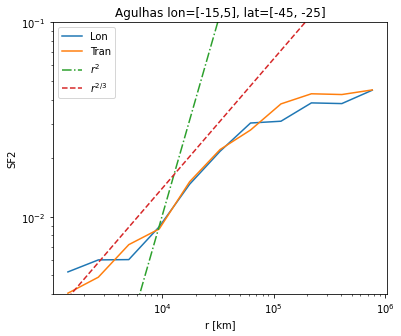

In [43]:
plt.figure(figsize=(6, 5))

plt.plot(dist_axis, SF2_ll_winter, label='Lon')
plt.plot(dist_axis, SF2_tt_winter, label='Tran')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 3e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([4e-3,1e-1])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Agulhas lon=[-15,5], lat=[-45, -25]')



Text(0.5, 1.0, 'Agulhas lon=[-15,5], lat=[-45, -25]')

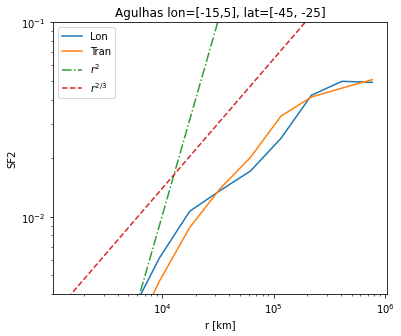

In [44]:
plt.figure(figsize=(6, 5))

plt.plot(dist_axis, SF2_ll_summer, label='Lon')
plt.plot(dist_axis, SF2_tt_summer, label='Tran')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 3e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([4e-3,1e-1])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Agulhas lon=[-15,5], lat=[-45, -25]')



Text(0.5, 1.0, 'Agulhas lon=[-15,5], lat=[-45, -25]')

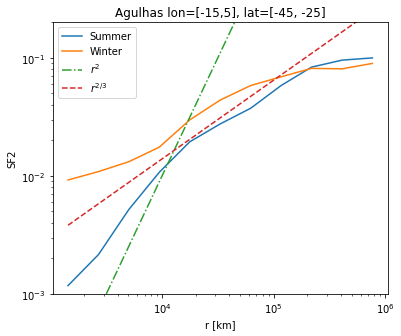

In [45]:
plt.figure(figsize=(6, 5))

plt.plot(dist_axis, SF2_ll_summer+SF2_tt_summer , label='Summer')
plt.plot(dist_axis, SF2_ll_winter+SF2_tt_winter , label='Winter')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 3e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([1e-3,2e-1])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Agulhas lon=[-15,5], lat=[-45, -25]')

In [46]:
def bs_samples_SF2(dist_axis, dof, pairs_dist):
    npairs_sep = np.NaN*np.ones_like(dist_axis)
    nblocks_sep = np.NaN*np.ones_like(dist_axis)
    nsamps_per_block_sep = np.NaN*np.ones_like(dist_axis)


    for i  in range(len_dist_axis):
        npairs_sep[i]  = len(pairs_dist[i].dul); # how long is the timeseries
        nblocks_sep[i] =  dof[i]#; % number of blocks at that separation (basically the dof)
        nsamps_per_block_sep[i] = np.ceil(npairs_sep[i]/ nblocks_sep[i]);


    num_bs_samp = 100

    SF2_ll_bs = np.NaN*np.ones((len_dist_axis, num_bs_samp))
    SF2_tt_bs = np.NaN*np.ones((len_dist_axis, num_bs_samp))

    for i in range(len_dist_axis):
        print(i)

        block_size = int(nsamps_per_block_sep[i]);
        nblocks = int(np.floor(npairs_sep[i]/nsamps_per_block_sep[i]));

        nmax = (nblocks*block_size);

        # make 2 arrays of shape block size X nblocks (some small amount of data is dropped in this step)
        dul_blocks = np.reshape(pairs_dist[i].dul[:nmax].values, (nblocks, block_size));
        dut_blocks = np.reshape(pairs_dist[i].dut[:nmax].values, (nblocks, block_size));


        for j in range(num_bs_samp):

            ids = np.random.choice(np.arange(0,nblocks,1), size=nblocks, replace=True)

            dul_bs = np.reshape(dul_blocks[ids, :], (-1))
            dut_bs = np.reshape(dut_blocks[ids, :], (-1))

            SF2_ll_bs[i,j] = np.nanmean(dul_bs**2)
            SF2_tt_bs[i,j] = np.nanmean(dut_bs**2)
        
    return SF2_ll_bs, SF2_tt_bs

In [47]:
Ttot = (24*3600)*120*5. # total duration of experiment (data)

Tscale_tot = 1./(((SF2_ll_winter +SF2_tt_winter)**0.5)/dist_axis); # A time scale based on velocity scales
dof_winter = np.ceil(Ttot/Tscale_tot); # this is essentially T_tot/T_scale(r) # how many degrees of freedom can we fit into the total experiment time

Tscale_tot = 1./(((SF2_ll_summer +SF2_tt_summer)**0.5)/dist_axis); # A time scale based on velocity scales
dof_summer = np.ceil(Ttot/Tscale_tot); # this is essentially T_tot/T_scale(r) # how many degrees of freedom can we fit into the total experiment time


In [48]:
SF2_ll_bs_winter, SF2_tt_bs_winter = bs_samples_SF2(dist_axis, dof_winter, pairs_dist_winter)

0
1
2
3
4
5
6
7
8
9
10


In [49]:
SF2_ll_bs_summer, SF2_tt_bs_summer = bs_samples_SF2(dist_axis, dof_summer, pairs_dist_summer)

0
1
2
3
4
5
6
7
8
9
10


In [50]:
SF2_rr_bs_winter = np.zeros_like(SF2_ll_bs_winter)
SF2_dd_bs_winter = np.zeros_like(SF2_ll_bs_winter)

SF2_rr_bs_summer = np.zeros_like(SF2_ll_bs_summer)
SF2_dd_bs_summer = np.zeros_like(SF2_ll_bs_summer)

num_bs_samp = 100
for i in range(num_bs_samp):
    
    SF2_rr_bs_winter[:, i], SF2_dd_bs_winter[:, i] = psm.helmholtz_decompose( dist_axis, SF2_ll_bs_winter[:,i], SF2_tt_bs_winter[:,i] )
    SF2_rr_bs_summer[:, i], SF2_dd_bs_summer[:, i] = psm.helmholtz_decompose( dist_axis, SF2_ll_bs_summer[:,i], SF2_tt_bs_summer[:,i] )    
    

In [51]:
SF2_ll_winter_mean = np.nanmean(SF2_ll_bs_winter, axis=1)
SF2_ll_winter_ci = np.nanpercentile(SF2_ll_bs_winter, [1,99], axis=1)

SF2_tt_winter_mean = np.nanmean(SF2_tt_bs_winter, axis=1)
SF2_tt_winter_ci = np.nanpercentile(SF2_tt_bs_winter, [1,99], axis=1)


SF2_ll_summer_mean = np.nanmean(SF2_ll_bs_summer, axis=1)
SF2_ll_summer_ci = np.nanpercentile(SF2_ll_bs_summer, [1,99], axis=1)

SF2_tt_summer_mean = np.nanmean(SF2_tt_bs_summer, axis=1)
SF2_tt_summer_ci = np.nanpercentile(SF2_tt_bs_summer, [1,99], axis=1)

In [52]:
SF2_rr_winter_mean = np.nanmean(SF2_rr_bs_winter, axis=1)
SF2_rr_winter_ci = np.nanpercentile(SF2_rr_bs_winter, [1,99], axis=1)

SF2_dd_winter_mean = np.nanmean(SF2_dd_bs_winter, axis=1)
SF2_dd_winter_ci = np.nanpercentile(SF2_dd_bs_winter, [1,99], axis=1)


SF2_rr_summer_mean = np.nanmean(SF2_rr_bs_summer, axis=1)
SF2_rr_summer_ci = np.nanpercentile(SF2_rr_bs_summer, [1,99], axis=1)

SF2_dd_summer_mean = np.nanmean(SF2_dd_bs_summer, axis=1)
SF2_dd_summer_ci = np.nanpercentile(SF2_dd_bs_summer, [1,99], axis=1)

In [53]:
SF2_tot_winter_mean = np.nanmean(SF2_ll_bs_winter + SF2_tt_bs_winter, axis=1)
SF2_tot_winter_ci = np.nanpercentile(SF2_ll_bs_winter + SF2_tt_bs_winter, [1,99], axis=1)

SF2_tot_summer_mean = np.nanmean(SF2_ll_bs_summer + SF2_tt_bs_summer, axis=1)
SF2_tot_summer_ci = np.nanpercentile(SF2_ll_bs_summer + SF2_tt_bs_summer, [1,99], axis=1)


Text(0.5, 1.0, 'Agulhas lon=[-15,5], lat=[-45, -25]')

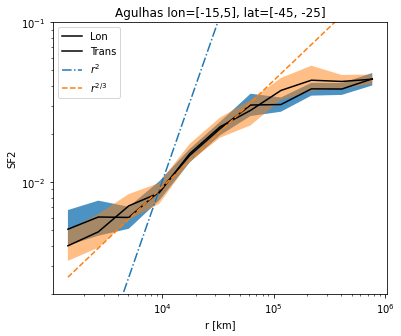

In [54]:
plt.figure(figsize=(6, 5))


plt.fill_between(dist_axis,SF2_ll_winter_ci[0,:], SF2_ll_winter_ci[1,:] , alpha=0.8)
plt.plot(dist_axis, SF2_ll_winter_mean, label='Lon', color='k')
#plt.plot(dist_axis, SF2_ll_ci[0,:], label='Lon')
#plt.plot(dist_axis, SF2_ll_ci[1,:], label='Lon')

plt.fill_between(dist_axis,SF2_tt_winter_ci[0,:], SF2_tt_winter_ci[1,:], alpha=0.5 )
plt.plot(dist_axis, SF2_tt_winter_mean, label='Trans', color='k')
#plt.plot(dist_axis, SF2_tt_mean, label='Lon')
#plt.plot(dist_axis, SF2_tt_ci[0,:], label='Lon')
#plt.plot(dist_axis, SF2_tt_ci[1,:], label='Lon')
#plt.plot(dist_axis, SF2_tt, label='Tran')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([2e-3,1e-1])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Agulhas lon=[-15,5], lat=[-45, -25]')

Text(0.5, 1.0, 'Agulhas lon=[-15,5], lat=[-45, -25]')

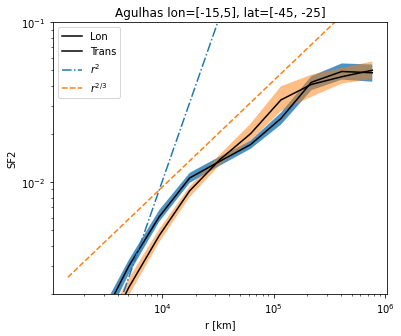

In [55]:
plt.figure(figsize=(6, 5))


plt.fill_between(dist_axis,SF2_ll_summer_ci[0,:], SF2_ll_summer_ci[1,:] , alpha=0.8)
plt.plot(dist_axis, SF2_ll_summer_mean, label='Lon', color='k')
#plt.plot(dist_axis, SF2_ll_ci[0,:], label='Lon')
#plt.plot(dist_axis, SF2_ll_ci[1,:], label='Lon')

plt.fill_between(dist_axis,SF2_tt_summer_ci[0,:], SF2_tt_summer_ci[1,:], alpha=0.5 )
plt.plot(dist_axis, SF2_tt_summer_mean, label='Trans', color='k')
#plt.plot(dist_axis, SF2_tt_mean, label='Lon')
#plt.plot(dist_axis, SF2_tt_ci[0,:], label='Lon')
#plt.plot(dist_axis, SF2_tt_ci[1,:], label='Lon')
#plt.plot(dist_axis, SF2_tt, label='Tran')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([2e-3,1e-1])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Agulhas lon=[-15,5], lat=[-45, -25]')

Text(0.5, 1.0, 'Agulhas lon=[-15,5], lat=[-45, -25]')

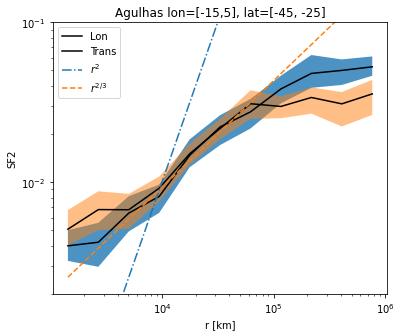

In [56]:
plt.figure(figsize=(6, 5))


plt.fill_between(dist_axis,SF2_rr_winter_ci[0,:], SF2_rr_winter_ci[1,:] , alpha=0.8)
plt.plot(dist_axis, SF2_rr_winter_mean, label='Lon', color='k')
#plt.plot(dist_axis, SF2_ll_ci[0,:], label='Lon')
#plt.plot(dist_axis, SF2_ll_ci[1,:], label='Lon')

plt.fill_between(dist_axis,SF2_dd_winter_ci[0,:], SF2_dd_winter_ci[1,:], alpha=0.5 )
plt.plot(dist_axis, SF2_dd_winter_mean, label='Trans', color='k')
#plt.plot(dist_axis, SF2_tt_mean, label='Lon')
#plt.plot(dist_axis, SF2_tt_ci[0,:], label='Lon')
#plt.plot(dist_axis, SF2_tt_ci[1,:], label='Lon')
#plt.plot(dist_axis, SF2_tt, label='Tran')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([2e-3,1e-1])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Agulhas lon=[-15,5], lat=[-45, -25]')

Text(0.5, 1.0, 'Agulhas lon=[-15,5], lat=[-45, -25]')

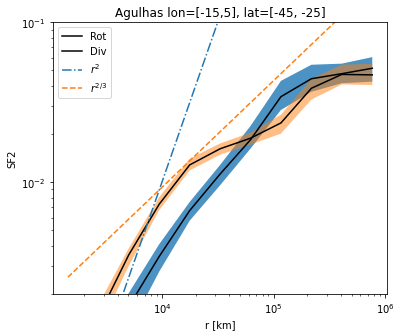

In [57]:
plt.figure(figsize=(6, 5))


plt.fill_between(dist_axis,SF2_rr_summer_ci[0,:], SF2_rr_summer_ci[1,:] , alpha=0.8)
plt.plot(dist_axis, SF2_rr_summer_mean, label='Rot', color='k')
#plt.plot(dist_axis, SF2_ll_ci[0,:], label='Lon')
#plt.plot(dist_axis, SF2_ll_ci[1,:], label='Lon')

plt.fill_between(dist_axis,SF2_dd_summer_ci[0,:], SF2_dd_summer_ci[1,:], alpha=0.5 )
plt.plot(dist_axis, SF2_dd_summer_mean, label='Div', color='k')
#plt.plot(dist_axis, SF2_tt_mean, label='Lon')
#plt.plot(dist_axis, SF2_tt_ci[0,:], label='Lon')
#plt.plot(dist_axis, SF2_tt_ci[1,:], label='Lon')
#plt.plot(dist_axis, SF2_tt, label='Tran')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([2e-3,1e-1])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Agulhas lon=[-15,5], lat=[-45, -25]')

In [ ]:
plt.figure(figsize=(6, 5))


plt.fill_between(dist_axis,SF2_tot_summer_ci[0,:], SF2_tot_summer_ci[1,:] , alpha=0.8)
plt.plot(dist_axis, SF2_tot_summer_mean, label='Summer', color='red')
#plt.plot(dist_axis, SF2_ll_ci[0,:], label='Lon')
#plt.plot(dist_axis, SF2_ll_ci[1,:], label='Lon')

plt.fill_between(dist_axis,SF2_tot_winter_ci[0,:], SF2_tot_winter_ci[1,:], alpha=0.5 )
plt.plot(dist_axis, SF2_tot_winter_mean, label='Winter', color='blue')
#plt.plot(dist_axis, SF2_tt_mean, label='Lon')
#plt.plot(dist_axis, SF2_tt_ci[0,:], label='Lon')
#plt.plot(dist_axis, SF2_tt_ci[1,:], label='Lon')
#plt.plot(dist_axis, SF2_tt, label='Tran')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([2e-3,3e-1])
plt.xlim([1e3,5e5])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Agulhas lon=[-15,5], lat=[-45, -25]')

Text(0.5, 1.0, 'Agulhas lon=[-15,5], lat=[-45, -25]')

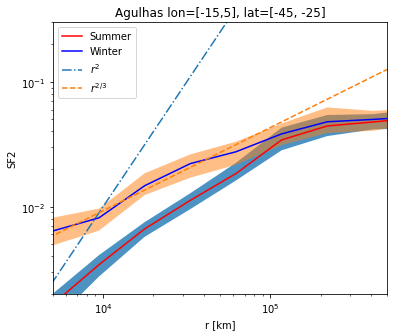

In [59]:
plt.figure(figsize=(6, 5))


plt.fill_between(dist_axis,SF2_rr_summer_ci[0,:], SF2_rr_summer_ci[1,:] , alpha=0.8)
plt.plot(dist_axis, SF2_rr_summer_mean, label='Summer', color='red')
#plt.plot(dist_axis, SF2_ll_ci[0,:], label='Lon')
#plt.plot(dist_axis, SF2_ll_ci[1,:], label='Lon')

plt.fill_between(dist_axis,SF2_rr_winter_ci[0,:], SF2_rr_winter_ci[1,:], alpha=0.5 )
plt.plot(dist_axis, SF2_rr_winter_mean, label='Winter', color='blue')
#plt.plot(dist_axis, SF2_tt_mean, label='Lon')
#plt.plot(dist_axis, SF2_tt_ci[0,:], label='Lon')
#plt.plot(dist_axis, SF2_tt_ci[1,:], label='Lon')
#plt.plot(dist_axis, SF2_tt, label='Tran')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([2e-3,3e-1])
plt.xlim([5e3,5e5])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Agulhas lon=[-15,5], lat=[-45, -25]')

Text(0.5, 1.0, 'Agulhas lon=[-15,5], lat=[-45, -25]')

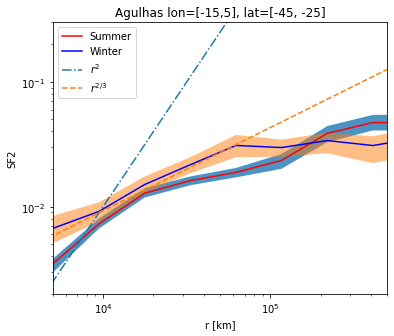

In [60]:
plt.figure(figsize=(6, 5))


plt.fill_between(dist_axis,SF2_dd_summer_ci[0,:], SF2_dd_summer_ci[1,:] , alpha=0.8)
plt.plot(dist_axis, SF2_dd_summer_mean, label='Summer', color='red')
#plt.plot(dist_axis, SF2_ll_ci[0,:], label='Lon')
#plt.plot(dist_axis, SF2_ll_ci[1,:], label='Lon')

plt.fill_between(dist_axis,SF2_dd_winter_ci[0,:], SF2_dd_winter_ci[1,:], alpha=0.5 )
plt.plot(dist_axis, SF2_dd_winter_mean, label='Winter', color='blue')
#plt.plot(dist_axis, SF2_tt_mean, label='Lon')
#plt.plot(dist_axis, SF2_tt_ci[0,:], label='Lon')
#plt.plot(dist_axis, SF2_tt_ci[1,:], label='Lon')
#plt.plot(dist_axis, SF2_tt, label='Tran')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([2e-3,3e-1])
plt.xlim([5e3,5e5])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Agulhas lon=[-15,5], lat=[-45, -25]')